# Imports and load data

In [152]:
import pandas as pd
import nltk
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [153]:
reviews = pd.read_csv("undersampled_Video_Games_reviews.csv")
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"11 26, 2015",A1IDUCEV1BX9K5,B018K6KV68,Mark Webb,"Overbearing static when using the headset microphone with the amplifier. Tested in two computers by different manufacturers. The headset is pointless without its main selling feature, so I opted to return the headset, citing a defect.",No Deal: Overbearing static.,1448496000,NaN,{'Package Type:': ' Standard Packaging'},NaN
1,1.0,False,"04 7, 2014",A14JFC91SO0UAK,B00IYWV852,NwolfZ,"where is lineage 3 ? been waiting, stop putting out fad of the month mmos and make a game someone might actually play for a year or two",why,1396828800,3.0,"{'Edition:': ' Deluxe', 'Platform:': ' PC Online Game Code'}",NaN
2,1.0,True,"01 2, 2014",A22UVUVV8E0L6C,B009AGXH64,Micah,"No games on this console worth buying at even garage sale prices. This thing will on-and-off refuse to connect to the internet (and yes, I tried it on various networking devices). I probably spent an hour of online time in the vague 20 hours of use I got out of it. In the middle of one online session, the signal it was sending to the tv became a digital mess, and the gamepad lost connection. I tried various things, and even tried calling customer support. They have nice voices and attitudes, but I don't know if they have ears. I told them all the various things I tried, and they made me try them several times over.\n\nI already disliked nintendo to begin with, but I got this console to play Sonic Lost World (as I am a fan of the series) and Monster Hunter 3 Ultimate (with a friend who lives a fair distance away). If anyone else has the mindset to get a wiiu for any purpose, I would strongly advise against it. I just gave the console to a computer shop in the town I live in and I was able to get money for the games and gamepad, but it pales in comparison to the money I could've gotten selling it online. I pity the buyers out there paying any more than $40 for the controllers, let alone the console or games.\n\nDon't get me wrong, I'm not so angry that I can't think. I'm not exaggerating at all, though, either. The only person I know other than myself who has a wiiu is that friend I wanted to play Monster Hunter 3 Ultimate with, and they also have constant connection problems.",No.,1388620800,2.0,NaN,NaN
3,1.0,True,"04 11, 2014",AYWLQV495MVRI,B001IK1BJ0,kris devereux,"i had such high hopes of orgins, i reallly wanted to like it i did, but it was flatter then a pancake gameplay wise",a mess of a game,1397174400,NaN,"{'Edition:': ' Standard', 'Platform:': ' Xbox 360'}",NaN
4,1.0,False,"02 15, 2017",A1PRLX14CBS93S,B00DSFW5MA,John R Clark,"Can not get it to work with steam games, All 4 controllers work fine in the menu, but go to play rocket league and none of the controllers work. There is a steam forum post that has gone unanswered for years. If you switch this to SINGLE controller mode it works with some games and not others. Research suggests you have to buy VirtualHere a $39 piece of software to make this work. Will not... Would not suggest to buy.",Steam games only can use 1 out of 4 controllers.,1487116800,NaN,{'Size:': ' 1 Pack'},NaN


# Tokenize the data

In [154]:
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
import string

In [155]:
reviews["rev_text_lower"] = reviews['reviewText'].apply(lambda rev: str(rev)\
                                                        .translate(str.maketrans('', '', punctuation))\
                                                        .replace("<br />", " ")\
                                                        .lower())

In [156]:
reviews[['reviewText','rev_text_lower']].sample(2)

,reviewText,rev_text_lower
1860,works good. my only complaint is the cords in the back for the av are smashed so i have to wiggle the plug to get it to work. other than that great system. controller was in good condition. only little wear and tear on system. shipping was fast. packaging was excellent. would order again.,works good my only complaint is the cords in the back for the av are smashed so i have to wiggle the plug to get it to work other than that great system controller was in good condition only little wear and tear on system shipping was fast packaging was excellent would order again
952,Game locked up after the single player campaign mission selection.,game locked up after the single player campaign mission selection


In [157]:
tb_tokenizer = TreebankWordTokenizer()

In [158]:
reviews["tb_tokens"] = reviews['rev_text_lower'].apply(lambda rev: tb_tokenizer.tokenize(str(rev)))

In [159]:
reviews[['reviewText','tb_tokens']].sample(2)

,reviewText,tb_tokens
431,"Do NOT stimulate these scalpers. This product was release costing U$30 now is being sold by $90. Activision is showing to be the WORST company ever. They are releasing few units of characters/packs randomly packed together with others. They are stimulating this black market with overpriced items. Don't buy to force this price down...\nActivision will never account on me for buying new franchises of Skylanders game. With this policy of traps/characters/packs that can't be separately sold, Activision missed myself as a Skylanders customer forever...","[do, not, stimulate, these, scalpers, this, product, was, release, costing, u30, now, is, being, sold, by, 90, activision, is, showing, to, be, the, worst, company, ever, they, are, releasing, few, units, of, characterspacks, randomly, packed, together, with, others, they, are, stimulating, this, black, market, with, overpriced, items, dont, buy, to, force, this, price, down, activision, will, never, account, on, me, for, buying, new, franchises, of, skylanders, game, with, this, policy, of, trapscharacterspacks, that, cant, be, separately, sold, activision, missed, myself, as, a, skylanders, customer, forever]"
918,"This is alot like mechwarrior.... If you take all the cool things about mechwarrior and either removed them ir significantly complicated them into a list of muddled messes...\n\nThis game plays like a brain tumor. It just bad.\nThe controls are awful... And even once you get used to them, the camera controls never seem intuitive or useful.\nThe process if personalizing your mech... Sorry... Hound... Is more like analyzing a spreadsheet of data than it is like equipping a missile launcher... Its borderline indecipherable from just making the player perform multivariate calculus... In their head... While listening to bad electronic/industrial music.\n\nThe missions... Are more like trials of tribulation that you not so much complete, as you master, since you will undoubtedly play them over a dozen times before you decipher the actual meaning of the briefing/objectives and fugure out what all the novel symbols on the abortion of a map they provide you with mean.\n\nAvoid. At. All. Costs.","[this, is, alot, like, mechwarrior, if, you, take, all, the, cool, things, about, mechwarrior, and, either, removed, them, ir, significantly, complicated, them, into, a, list, of, muddled, messes, this, game, plays, like, a, brain, tumor, it, just, bad, the, controls, are, awful, and, even, once, you, get, used, to, them, the, camera, controls, never, seem, intuitive, or, useful, the, process, if, personalizing, your, mech, sorry, hound, is, more, like, analyzing, a, spreadsheet, of, data, than, it, is, like, equipping, a, missile, launcher, its, borderline, indecipherable, from, just, making, the, player, perform, multivariate, calculus, in, their, head, while, listening, to, bad, ...]"


# Stemming

In [160]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
reviews['tokens_stemmed'] = reviews['tb_tokens'].apply(lambda words: [stemmer.stem(w) for w in words])

In [161]:
reviews[['tb_tokens','tokens_stemmed']].sample(3)

,tb_tokens,tokens_stemmed
1019,"[it, is, a, great, driving, and, racing, car, game, i, love, the, graphics, and, gameplay]","[it, is, a, great, drive, and, race, car, game, i, love, the, graphic, and, gameplay]"
2337,"[these, are, one, of, the, nicest, things, out, there, for, keeping, your, games, dustdirtgrime, free, etc, everyone, should, use, them, to, keep, their, games, clean]","[these, are, one, of, the, nicest, thing, out, there, for, keep, your, game, dustdirtgrim, free, etc, everyon, should, use, them, to, keep, their, game, clean]"
771,"[beautiful, game, fun, to, play, yadda, yadda, yadda, as, others, have, noted, this, is, only, the, terran, campaign, and, that, is, why, i, hate, having, paid, 60, for, it, i, played, wow, for, almost, 3, years, and, have, gotten, well, used, to, blizzivision, milking, the, fan, base, this, is, a, new, low, i, have, always, preferred, to, play, protoss, and, after, waiting, all, this, time, buying, the, game, sight, unseen, boy, am, i, pissed, at, the, outrageous, greed, of, only, including, one, campaign, as, a, gamer, i, have, given, blizzard, thousands, of, dollars, for, games, and, subscriptions, they, have, given, ...]","[beauti, game, fun, to, play, yadda, yadda, yadda, as, other, have, note, thi, is, onli, the, terran, campaign, and, that, is, whi, i, hate, have, paid, 60, for, it, i, play, wow, for, almost, 3, year, and, have, gotten, well, use, to, blizzivis, milk, the, fan, base, thi, is, a, new, low, i, have, alway, prefer, to, play, protoss, and, after, wait, all, thi, time, buy, the, game, sight, unseen, boy, am, i, piss, at, the, outrag, greed, of, onli, includ, one, campaign, as, a, gamer, i, have, given, blizzard, thousand, of, dollar, for, game, and, subscript, they, have, given, ...]"


# Lemmatisation

In [232]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

In [163]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [182]:
lemmatizer = WordNetLemmatizer()
def get_lemas(tokens):
    lemmas = []
    for token in tokens:
        pos = penn_to_wn(pos_tag([token])[0][1])
        if pos:
            lemma = lemmatizer.lemmatize(token, pos)
            if lemma:
                lemmas.append(lemma)
    return lemmas

In [202]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')

[nltk_data] Downloading package punkt to C:\Users\Ehsan Karegar
[nltk_data]     Froogh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ehsan Karegar
[nltk_data]     Froogh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Ehsan Karegar
[nltk_data]     Froogh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to C:\Users\Ehsan Karegar
[nltk_data]     Froogh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.


True

In [184]:
reviews['lemmas'] = reviews['tb_tokens'].apply(lambda tokens: get_lemas(tokens))

In [185]:
reviews[['tb_tokens','tokens_stemmed', 'lemmas']].sample(3)

,tb_tokens,tokens_stemmed,lemmas
1306,"[the, game, is, fun, to, play, and, definitely, gives, you, a, good, work, out, but, the, tracking, is, lacking, despite, having, what, i, would, think, is, enough, light, id, get, a, lot, of, error, messages, and, it, would, show, my, knees, as, my, feet, making, the, points, system, inaccurate, just, dance, has, no, problem, tracking, us, i, dont, know, why, this, game, has, such, a, hard, time]","[the, game, is, fun, to, play, and, definit, give, you, a, good, work, out, but, the, track, is, lack, despit, have, what, i, would, think, is, enough, light, id, get, a, lot, of, error, messag, and, it, would, show, my, knee, as, my, feet, make, the, point, system, inaccur, just, danc, ha, no, problem, track, us, i, dont, know, whi, thi, game, ha, such, a, hard, time]","[game, be, fun, play, definitely, give, good, work, track, be, lack, have, i, think, be, enough, light, id, get, lot, error, message, show, knee, foot, make, point, system, inaccurate, just, dance, have, problem, track, i, dont, know, game, have, such, hard, time]"
878,"[i, think, it, has, been, said, over, and, over, here, one, of, the, most, important, aspects, of, a, game, is, the, connection, that, the, player, feels, with, the, protagonist, either, you, like, or, feel, empathy, for, the, main, character, but, in, this, game, i, just, cant, help, but, dislike, this, ridiculous, indian, boy, aka, connor, i, dont, feel, connected, to, the, character, and, thus, dont, feel, connected, to, the, game, itself, with, in, turn, makes, it, boring, in, assassins, creed, 2, you, cant, help, but, like, ezio, but, here, its, the, complete, opposite]","[i, think, it, ha, been, said, over, and, over, here, one, of, the, most, import, aspect, of, a, game, is, the, connect, that, the, player, feel, with, the, protagonist, either, you, like, or, feel, empathi, for, the, main, charact, but, in, thi, game, i, just, cant, help, but, dislik, thi, ridicul, indian, boy, aka, connor, i, dont, feel, connect, to, the, charact, and, thu, dont, feel, connect, to, the, game, itself, with, in, turn, make, it, bore, in, assassin, creed, 2, you, cant, help, but, like, ezio, but, here, it, the, complet, opposit]","[i, think, have, be, say, here, most, important, aspect, game, be, connection, player, feel, protagonist, feel, empathy, main, character, game, i, just, cant, help, dislike, ridiculous, indian, boy, aka, connor, i, dont, feel, connect, character, thus, dont, feel, connect, game, turn, make, boring, assassin, creed, cant, help, ezio, here, complete, opposite]"
2069,"[it, doesnt, really, connect, to, anything, it, just, holds, on, to, the, edge, of, the, tv, with, a, foot, that, adjust, to, the, back, to, keep, it, upright, good, news, everyone, the, mount, been, sitting, for, months, on, top, of, my, tv, with, no, problems, even, with, a, 2, year, old, banging, on, the, tv, the, only, thing, i, didnt, like, was, how, the, foot, that, you, have, to, manually, adjust, feels, like, youre, about, to, break, it]","[it, doesnt, realli, connect, to, anyth, it, just, hold, on, to, the, edg, of, the, tv, with, a, foot, that, adjust, to, the, back, to, keep, it, upright, good, news, everyon, the, mount, been, sit, for, month, on, top, of, my, tv, with, no, problem, even, with, a, 2, year, old, bang, on, the, tv, the, onli, thing, i, didnt, like, wa, how, the, foot, that, you, have, to, manual, adjust, feel, like, your, about, to, break, it]","[doesnt, really, connect, anything, just, hold, edge, tv, foot, adjust, back, keep, upright, good, news, everyone, mount, be, sit, month, top, tv, problem, even, year, old, banging, tv, only, thing, i, didnt, be, foot, have, manually, adjust, feel, youre, break]"


# Sentiment Predictor Baseline Model

In [216]:
def get_sentiment_score(tokens):
    score = 0
    tags = pos_tag(tokens)
    for word, tag in tags:
        wn_tag = penn_to_wn(tag)
        if not wn_tag:
            continue
        synsets = wn.synsets(word, pos=wn_tag)
        if not synsets:
            continue
        
        # most common set:
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        
        score += (swn_synset.pos_score() - swn_synset.neg_score())
        
    return score

## Sentiment analysis
For both lemmitization and stemming for comparison.

In [224]:
reviews['lemmas_sentiment_score'] = reviews['lemmas'].apply(lambda tokens: get_sentiment_score(tokens))

In [225]:
reviews['stem_sentiment_score'] = reviews['tokens_stemmed'].apply(lambda tokens: get_sentiment_score(tokens))

## Compare the results
For some samples

In [254]:
reviews[['overall', 'reviewText', 'lemmas_sentiment_score', 'stem_sentiment_score']].sample(2)

,overall,reviewText,lemmas_sentiment_score,stem_sentiment_score
1189,3.0,"Far Cry 4 does not disappoint. I'm only about 20 hours in to the game and am loving it. If you played Far Cry 3, this game follows pretty much the same formula, with a few very cool changes and additions.\n\nUpdate 12/14 - I've been playing this game for 3 weeks now, probably 40-50 hours (which tells you that despite my complaints, it's still well worth the money)....I love the game, and have finished all the ""normal world"" missions. But the Shangri-La missions are maddingly annoying frustrating escapades. You are only armed with a bow and arrow, and the save or check points are few and far between. The 4th and last mission has me so frustrated that I'm thinking I'm just not going to worry about finishing it: you have to hit a big ""phoenix"" bird perfectly in the mouth a number of times, then order a magic tiger to attack it, then hit it in the mouth again. Then you have to repeat the process - ? - not sure how many times, because I keep getting killed by its minions before I can finish it. And then the whole process starts from the beginning. WTF.\n\nIt's almost like the Shangri-La missions were not designed by the same person that did the rest of the game.\n\nIn addition, now that I have opened up the entire map, I find that the lack of availability of the helicopters is quite annoying. Yeah, it's great that this is such a HUGE world, but exploring it by car takes forever! And fast tracking to a known helicopter location and then flying all the way back takes almost as long. I originally gave the game 5 stars, but have knocked it down to 3 because of the Shangri-La mess and the lack of helicopters.",0.500,-1.5
2457,5.0,we loved it!!!!,0.625,0.5


## Ploting the results

In [268]:
reviews['lemmas_swn_sentiment'] = reviews['lemmas_sentiment_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

reviews['tokens_stemmed_swn_sentiment'] = reviews['stem_sentiment_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

Text(0.5, 1.0, 'stemmed')

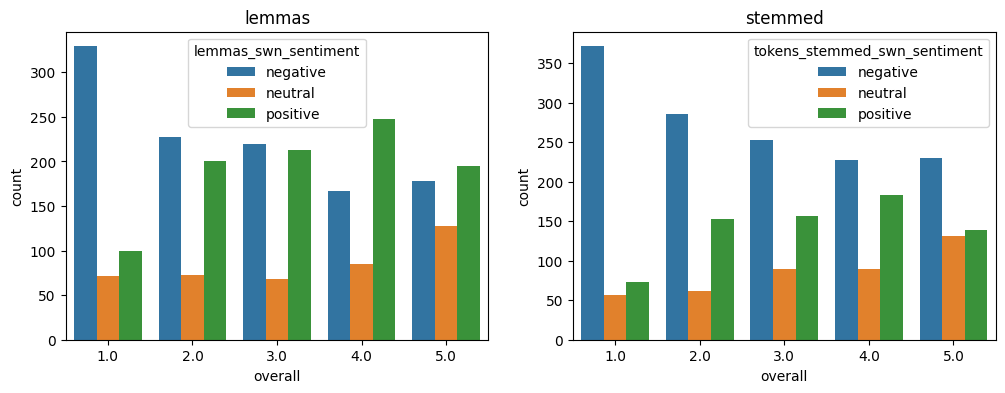

In [275]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='overall', hue='lemmas_swn_sentiment' ,data = reviews, ax=ax1)
ax1.set_title('lemmas')

sns.countplot(x='overall', hue='tokens_stemmed_swn_sentiment' ,data = reviews, ax=ax2)
ax2.set_title('stemmed')